# Storage-X figures

Description

In [1]:
import warnings
warnings.filterwarnings("ignore")
import yaml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Standardize figure layout:

In [2]:
tech_colors_path = 'scripts/tech_colors.yaml'

fs = 18
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True

with open(tech_colors_path) as file:
    tech_colors = yaml.safe_load(file)['tech_colors']
tech_colors['CO2 capture'] = tech_colors['DAC']
tech_colors['domestic demand'] = '#050000'
tech_colors['industry demand'] = '#423737'
tech_colors['BEV'] = 'c'
tech_colors['EV battery'] = 'c'
tech_colors['heat pump'] = '#b52f2f'
tech_colors['resistive heater'] = '#c45c5c'
tech_colors['V2G'] = '#38f2d9'
tech_colors['transmission lines'] = '#6c9459'
tech_colors['storage-X'] = '#610555'
tech_colors['storage X'] = '#610555'
tech_colors['X'] = '#610555'
tech_colors['pumped hydro'] = tech_colors['hydroelectricity']
tech_colors['biomass CHP CC'] = '#211408' # "#6e441c"
tech_colors['gas CHP CC'] = '#211508' # "#6e441c"

## Temporal balance

In [3]:
networks_opt = {'path':'networks/high_efficiency/',
                'wyear': '2003', 
                'eta1':'1.0', 
                'eta2':'1.9',
                'c1':'1.0', 
                'c2':'1.0', 
                'chat':'0.15'} # Check which network configurations are available in your path

Description
Moving average equal to, e.g, 24 takes the first 24 values (with 3-hourly resoulution, this is equivalent to a 3-daily moving average)

In [4]:
from scripts.Balancing_temporal_figures import temporal

INFO:pypsa.io:Imported network elec_s_y2003_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.0-X Charge+c1.0-X Discharge+e1.9-X Discharge+c1.0-X Store+c0.15.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


dropping Index(['CCGT', 'CHP CC', 'CO2 capture', 'coal', 'helmeth',
       'transmission lines'],
      dtype='object')
dropping Index(['CCGT', 'CHP CC', 'CO2 capture', 'coal', 'helmeth',
       'transmission lines'],
      dtype='object')


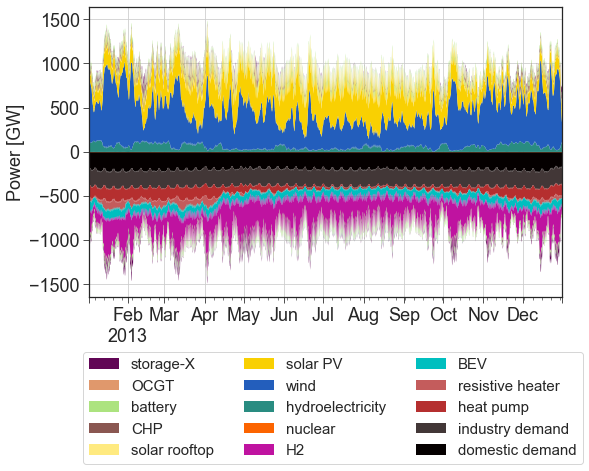

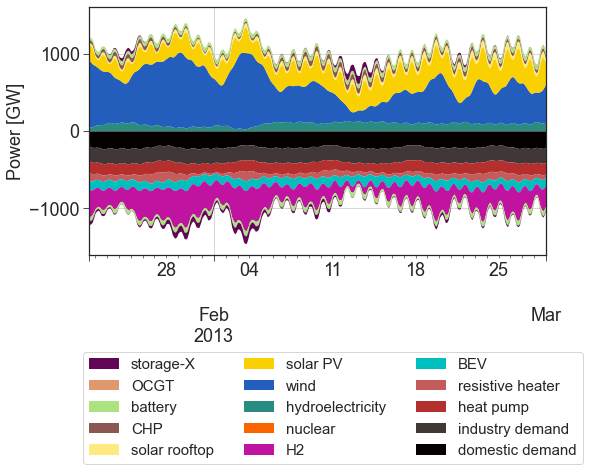

In [5]:
temporal(networks_opt, scen='-T-H-I-B', moving_average=12, tech_colors=tech_colors);

## Single-parametric sweep

Description 

Choose between metrics such as 'E', 'lc', 'G_discharge', 'duration', and 'system_cost'

In [6]:
from scripts.Single_parameter_sweep_w_weather import single_parametric_sweep

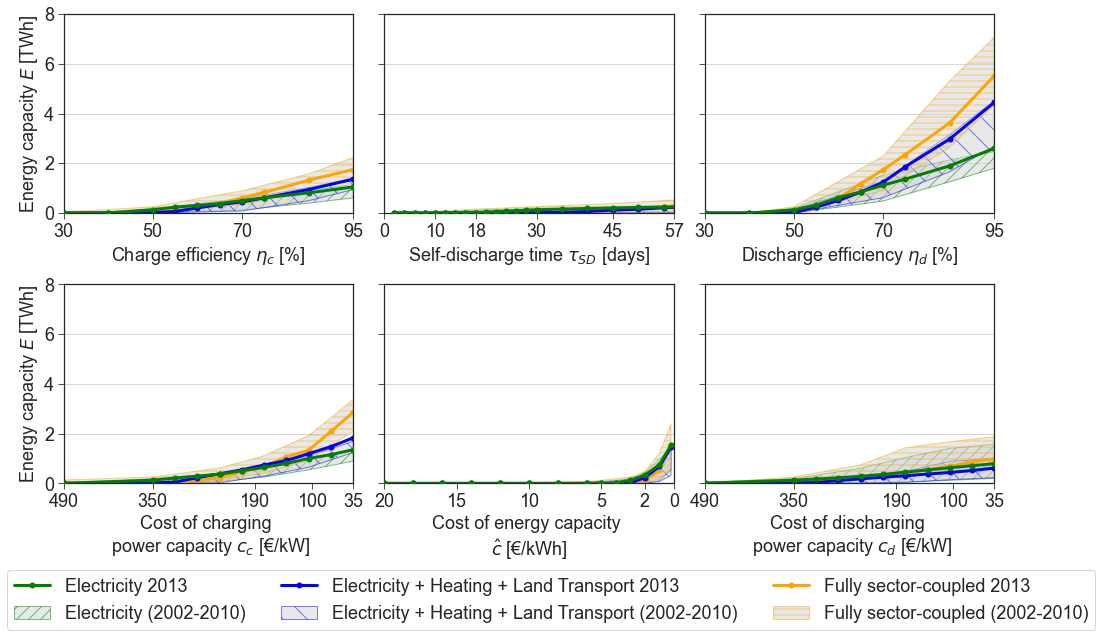

In [7]:
single_parametric_sweep(variable='E')

## Spiderweb

Description 

Define lower threshold of energy capacity "threshold_E" for the storage configuration to be included. Emerging candidates can be included. Choose between:

- aCAES
- LAES
- TES
- PTES
- MSES
- RFB
- H2

Furthermore, choose between system compositions (input variable *scen*):
- '0' (SC1)
- 'T-H' (SC2)
- 'T-H-I-B' (SC3)


In [8]:
from scripts.Spiderweb import plot_spiderweb

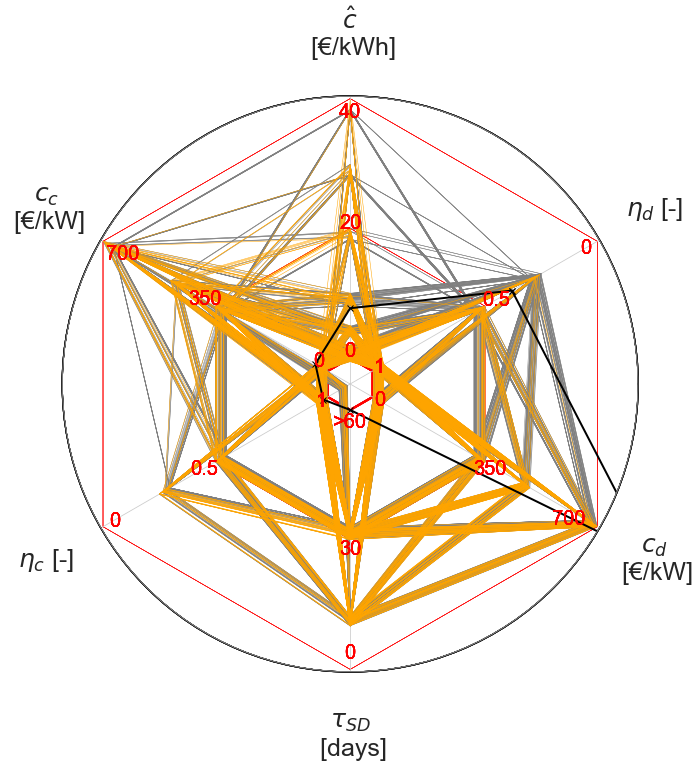

In [9]:
plot_spiderweb(scen = 'T-H-I-B', threshold_E = 2000, plot_ex = True, candidate = 'TES')

## Multivariate regression

Calculate the normalized coefficients by fitting a generalized linear regression model to the considering output metric. Here, demonstrated with the energy capacity "E" (For load coverage, change the fitting variable to "LC". For system cost reduction, change this to "SCR"). This is done for all three system compositions:

In [10]:
from scripts.multivariate_regression import multivariate_regression

Sector:  T-H-I-B
R-squared for energy capacity fit: 
0.375

Sector:  T-H
R-squared for energy capacity fit: 
0.386

Sector:  -
R-squared for energy capacity fit: 
0.474



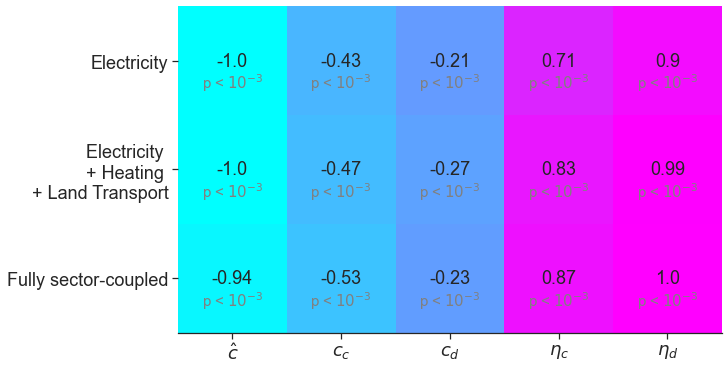

In [11]:
multivariate_regression(fitting='E');

## Storage requirements matrix

In [12]:
from scripts.matrix_design_space import plot_matrix

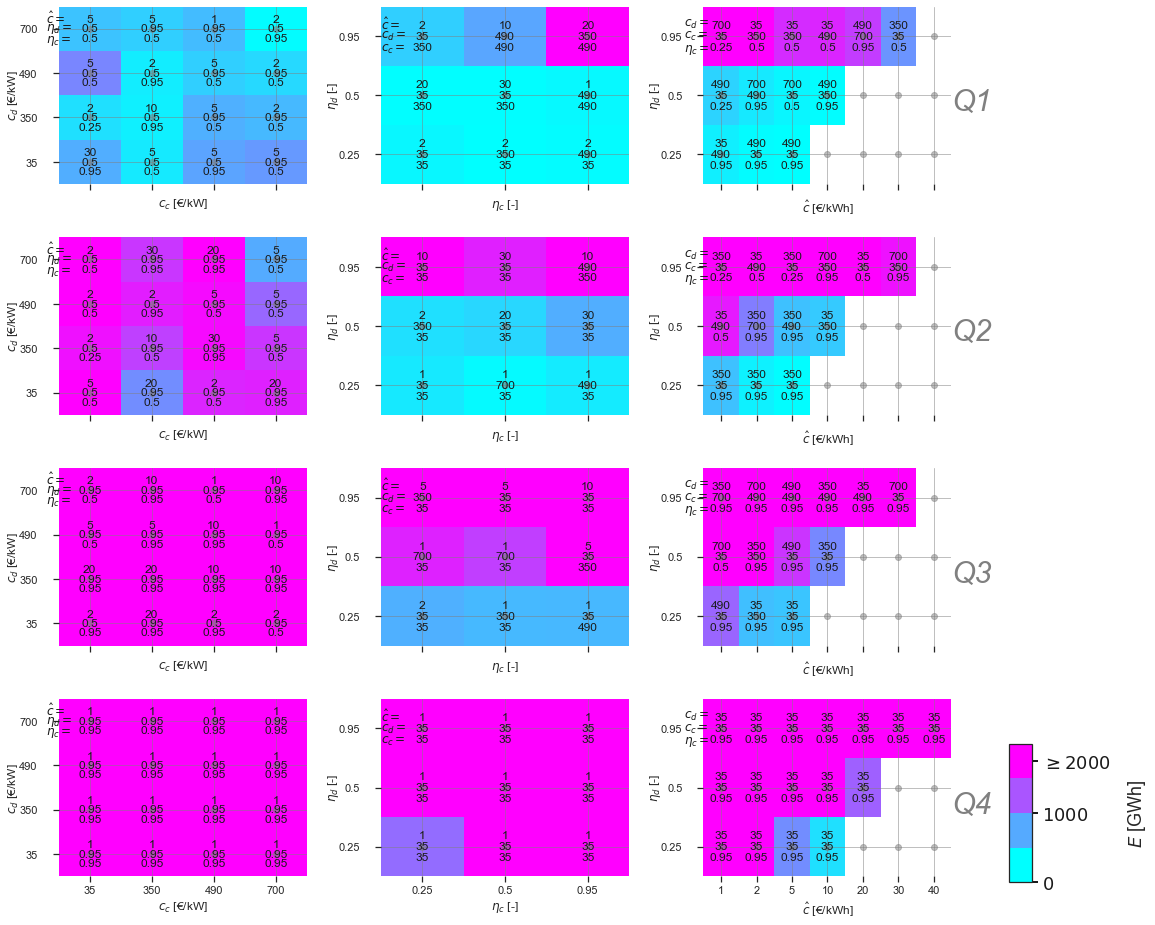

In [13]:
plot_matrix(quantiles = [0.25,0.50,0.75,1.00], 
            sector = 'T-H-I-B', 
            threshold_E = 2000, 
            omit_charge_efficiency = True, 
            lock_tau = False, 
            shading = 'nearest')

## Existing techs

Description

In [14]:
from scripts.read_ex_tech_nc_files import plot_existingtechs_result

SC1


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-solar+p3-dist1-X Charge+e1.36-X Charge+c1.34-X Discharge+e1.0-X Discharge+c3.27-X Store+c0.55.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC1


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-solar+p3-dist1-X Charge+e1.54-X Charge+c1.67-X Discharge+e1.3-X Discharge+c1.67-X Store+c1.6.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC1


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-solar+p3-dist1-X Charge+e1.7-X Charge+c0.52-X Discharge+e1.7-X Discharge+c0.52-X Store+c6.0.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC1


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-solar+p3-dist1-X Charge+e1.84-X Charge+c0.93-X Discharge+e1.3-X Discharge+c1.87-X Store+c1.35.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC1


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-solar+p3-dist1-X Charge+e1.96-X Charge+c0.11-X Discharge+e0.76-X Discharge+c2.57-X Store+c0.4.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC1


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-solar+p3-dist1-X Charge+e1.98-X Charge+c0.31-X Discharge+e0.86-X Discharge+c3.09-X Store+c0.9.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC1


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-solar+p3-dist1-X Charge+e4.4-X Charge+c0.97-X Discharge+e0.5-X Discharge+c1.94-X Store+c1.0.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC2


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.36-X Charge+c1.34-X Discharge+e1.0-X Discharge+c3.27-X Store+c0.55.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC2


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.54-X Charge+c1.67-X Discharge+e1.3-X Discharge+c1.67-X Store+c1.6.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC2


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.7-X Charge+c0.52-X Discharge+e1.7-X Discharge+c0.52-X Store+c6.0.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC2


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.84-X Charge+c0.93-X Discharge+e1.3-X Discharge+c1.87-X Store+c1.35.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC2


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.96-X Charge+c0.11-X Discharge+e0.76-X Discharge+c2.57-X Store+c0.4.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC2


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.98-X Charge+c0.31-X Discharge+e0.86-X Discharge+c3.09-X Store+c0.9.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


SC2


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e4.4-X Charge+c0.97-X Discharge+e0.5-X Discharge+c1.94-X Store+c1.0.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


E


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-solar+p3-dist1-X Charge+e1.36-X Charge+c1.34-X Discharge+e1.0-X Discharge+c3.27-X Store+c0.55.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


E


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-solar+p3-dist1-X Charge+e1.54-X Charge+c1.67-X Discharge+e1.3-X Discharge+c1.67-X Store+c1.6.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


E


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-solar+p3-dist1-X Charge+e1.7-X Charge+c0.52-X Discharge+e1.7-X Discharge+c0.52-X Store+c6.0.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


E


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-solar+p3-dist1-X Charge+e1.84-X Charge+c0.93-X Discharge+e1.3-X Discharge+c1.87-X Store+c1.35.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


E


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-solar+p3-dist1-X Charge+e1.96-X Charge+c0.11-X Discharge+e0.76-X Discharge+c2.57-X Store+c0.4.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


E


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-solar+p3-dist1-X Charge+e1.98-X Charge+c0.31-X Discharge+e0.86-X Discharge+c3.09-X Store+c0.9.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


E


INFO:pypsa.io:Imported network elec_s_y2013_n37_lv1.0__Co2L0.05-3H-T-H-solar+p3-dist1-X Charge+e4.4-X Charge+c0.97-X Discharge+e0.5-X Discharge+c1.94-X Store+c1.0.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


0.0
0.1
0.2
1.0
1.1
1.2
2.0
2.1
2.2
3.0
3.1
3.2
4.0
4.1
4.2
5.0
5.1
5.2
6.0
6.1
6.2


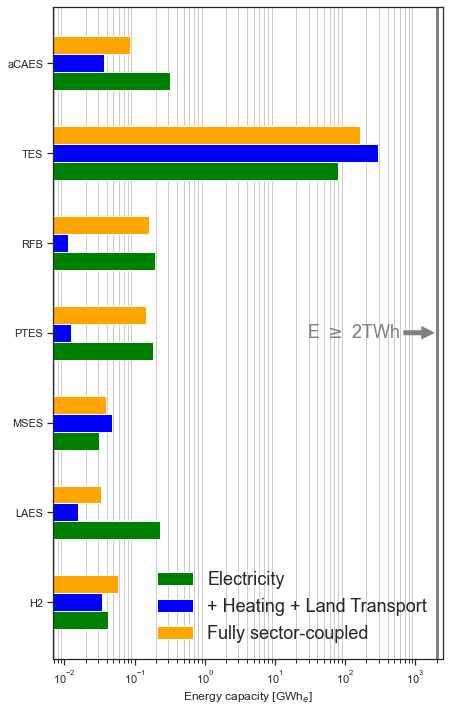

In [15]:
fig = plot_existingtechs_result()

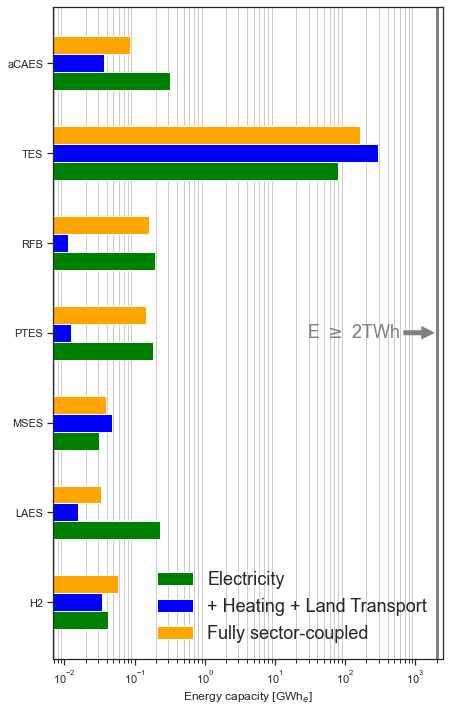

In [16]:
fig

## Plot generation mix

In [17]:
from scripts.Generation_mix import plot_generation_mix

Sector: T-H-I-B
Wind: 56.3 pm 1.0
Solar: 34.2 pm 1.2
Hydro: 6.4 pm 0.1


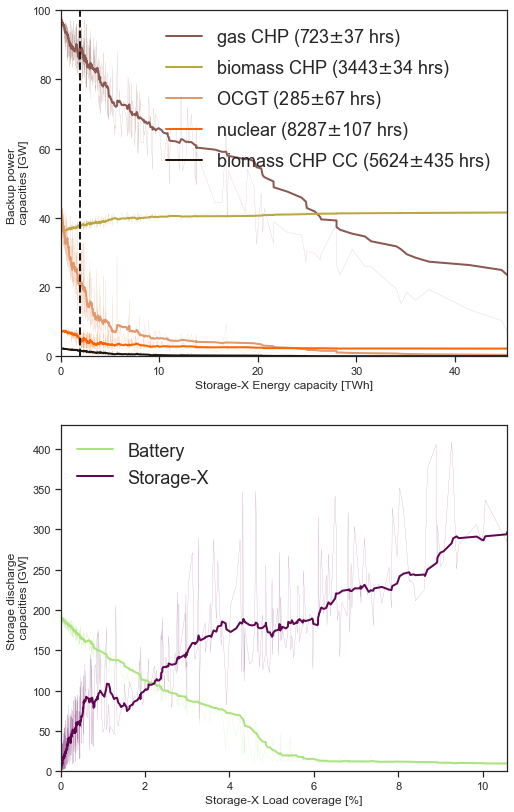

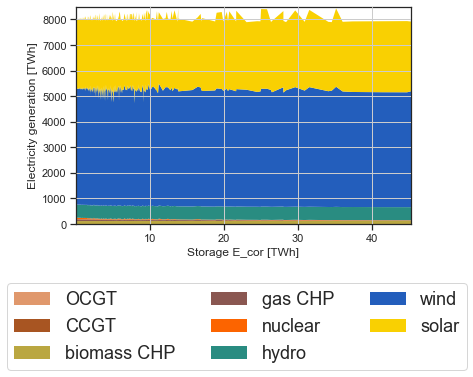

In [18]:
plot_generation_mix(tech_colors,sector='T-H-I-B')

## System cost reduction and renewable curtailment

In [19]:
from scripts.Scatterplot import plot_scatter

curtailment
c_sys [bEUR]


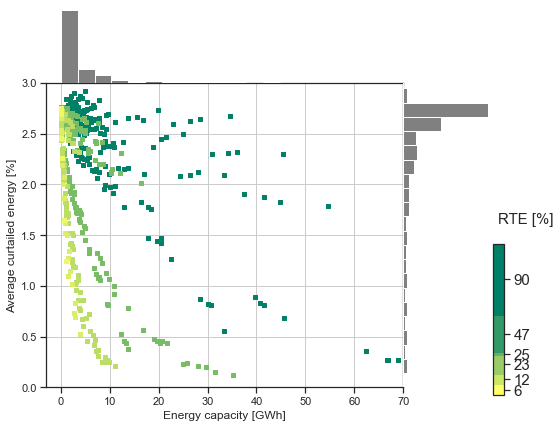

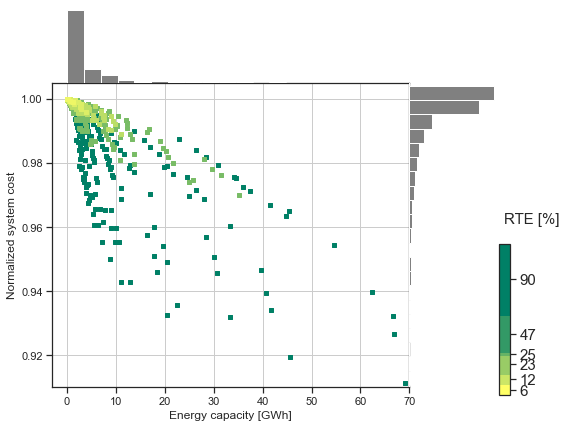

In [20]:
plot_scatter(sector='T-H-I-B',color_acc_to='RTE', binwidth_factor = 0.05)